### Objective:
It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.So it is required to  model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.

In [564]:
# Import all required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# To display all columns
pd.set_option('display.max_columns', None)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [565]:
# Read the data with na_filter to avoid valid NA getting converted to np.Nan
housing_df = pd.read_csv("train.csv", na_filter = False)

# All empty values are coverted to Nan values
housing_df = housing_df.replace(r'', np.nan, regex=True)
housing_df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [566]:
# Get data dimension
housing_df.shape

(1460, 81)

In [567]:
# Look for column Datatypes
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [568]:
housing_df.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
5%       73.950000    20.000000    3311.700000     4.000000     4.000000   
10%     146.900000    20.000000    5000.000000     5.000000     5.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
90%    1314.100000   120.000000   14381.700000     8.000000     7.000000   
99%    1445.410000   190.000000   37567.640000    10.000000     9.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411   
std      30.202904     20.645407   456.098091   161.319273   441.866955   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
5%     1916.000000   1950.000000     0.000000     0.000000     0.000000   
10%    1924.900000   1950.000000     0.000000     0.000000    74.900000   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000   
90%    2006.000000   2006.000000  1065.500000   117.200000  1232.000000   
99%    2009.000000   2009.000000  1572.410000   830.380000  1797.050000   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
5%      519.300000   672.950000     0.000000      0.000000   848.000000   
10%     636.900000   756.900000     0.000000      0.000000   912.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
90%    1602.200000  1680.000000   954.200000      0.000000  2158.300000   
99%    2155.050000  2219.460000  1418.920000    360.000000  3123.480000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
5%         0.000000      0.000000     1.000000     0.000000      2.000000   
10%        0.000000      0.000000     1.000000     0.000000      2.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
90%        1.000000      0.000000     2.000000     1.000000      4.000000   
99%        2.000000      1.000000     3.000000     1.000000      5.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea 

In [569]:
# Check for null values in all columns
null_val_perc_dict = dict(100*(housing_df.isnull().sum()/len(housing_df.index)).sort_values(ascending = False))
null_val_perc_dict

{'SalePrice': 0.0,
 'Heating': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.0,
 'MasVnrArea': 0.0,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 0.0,
 'BsmtCond': 0.0,
 'BsmtExposure': 0.0,
 'BsmtFinType1': 0.0,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 0.0,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'YearRemodAdd': 0.0,
 'YearBuilt': 0.0,
 'OverallCond': 0.0,
 'LandContour': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 0.0,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 0.0,
 'LotShape': 0.0,
 'Utilities': 0.0,
 'OverallQual': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'TotalBsmtSF': 0.0,
 'HeatingQC': 0.0,
 'SaleCondition': 0.0,
 'CentralAir': 0.0,
 'GarageArea': 0.0,
 'GarageQual': 0.0,
 'GarageCond': 0.0,
 'PavedDrive': 0.0,
 'WoodDeckSF': 0.0,
 'OpenPorchSF': 0.0,
 'EnclosedPorch': 0.0,
 '3SsnPorch':

## 2. Data Preparation

In [570]:
# 'LotFrontage' does no have any information on 'NA' hence considering it as null value
housing_df['LotFrontage'] =housing_df['LotFrontage'].replace('NA', np.nan)
# Imputing the null values with median
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())
# Converting to integer dtype as the column has numerical data.
housing_df['LotFrontage'] = pd.to_numeric(housing_df['LotFrontage'], errors='coerce')

In [571]:
# Get the list of categorical columns
categorical_columns_lst = list(housing_df.select_dtypes(exclude=['int64', 'float64']).columns)

# Get non categorical columns
non_categorical_cols_lst = list(housing_df.select_dtypes(exclude=['object']).columns)

print("Categorical columns --> ", categorical_columns_lst)
print("\nNumber of categorical columns -->", len(categorical_columns_lst))

print("\nNumerical columns --> ", non_categorical_cols_lst)
print("\nNumber of Numerical columns -->", len(non_categorical_cols_lst))



Categorical columns -->  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical columns --> 45

Numerical columns -->  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', '

### EDA

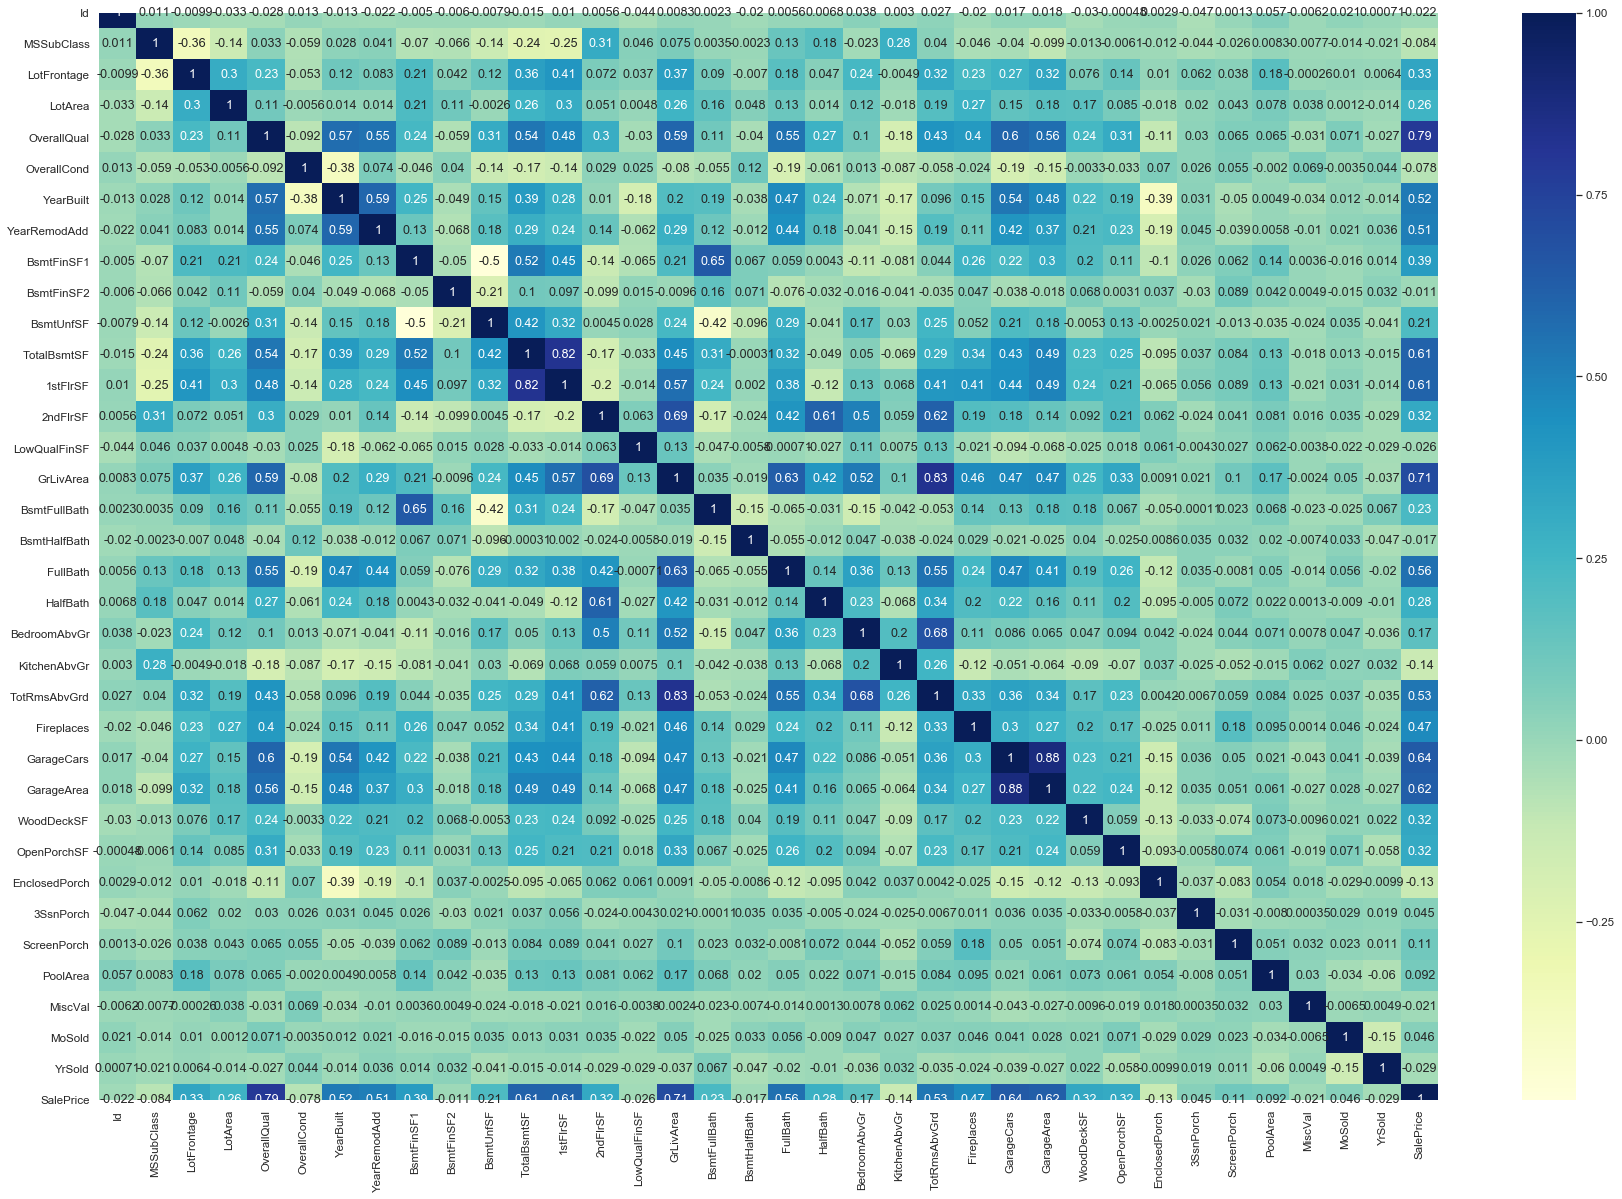

In [572]:
plt.figure(figsize = (30,20))
sns.heatmap(housing_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

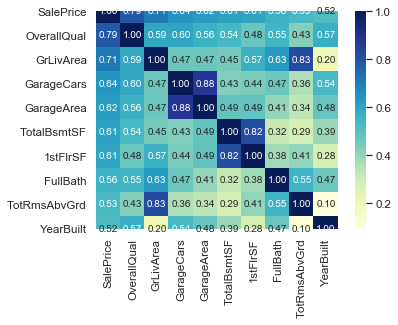

In [573]:
k = 10
cols = housing_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_df[cols].values.T)
sns.set(font_scale=1.05)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### OverallQual, GrLivArea, GarageCars are highly correlated with SalePrice.
### GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd and YearBuilt are also correlated SalePrice.
#### GarageArea and GarageCars are highly correlated
#### TotRmsAbvGrd and GrLivArea are highly correlated
#### 1stFlrSF and TotalBsmtSF are highly correlated

#### GrLivArea, GarageArea, 'TotalBsmtSF', '1stFlrSF' and YearBuilt are linearly related to SalePrice.

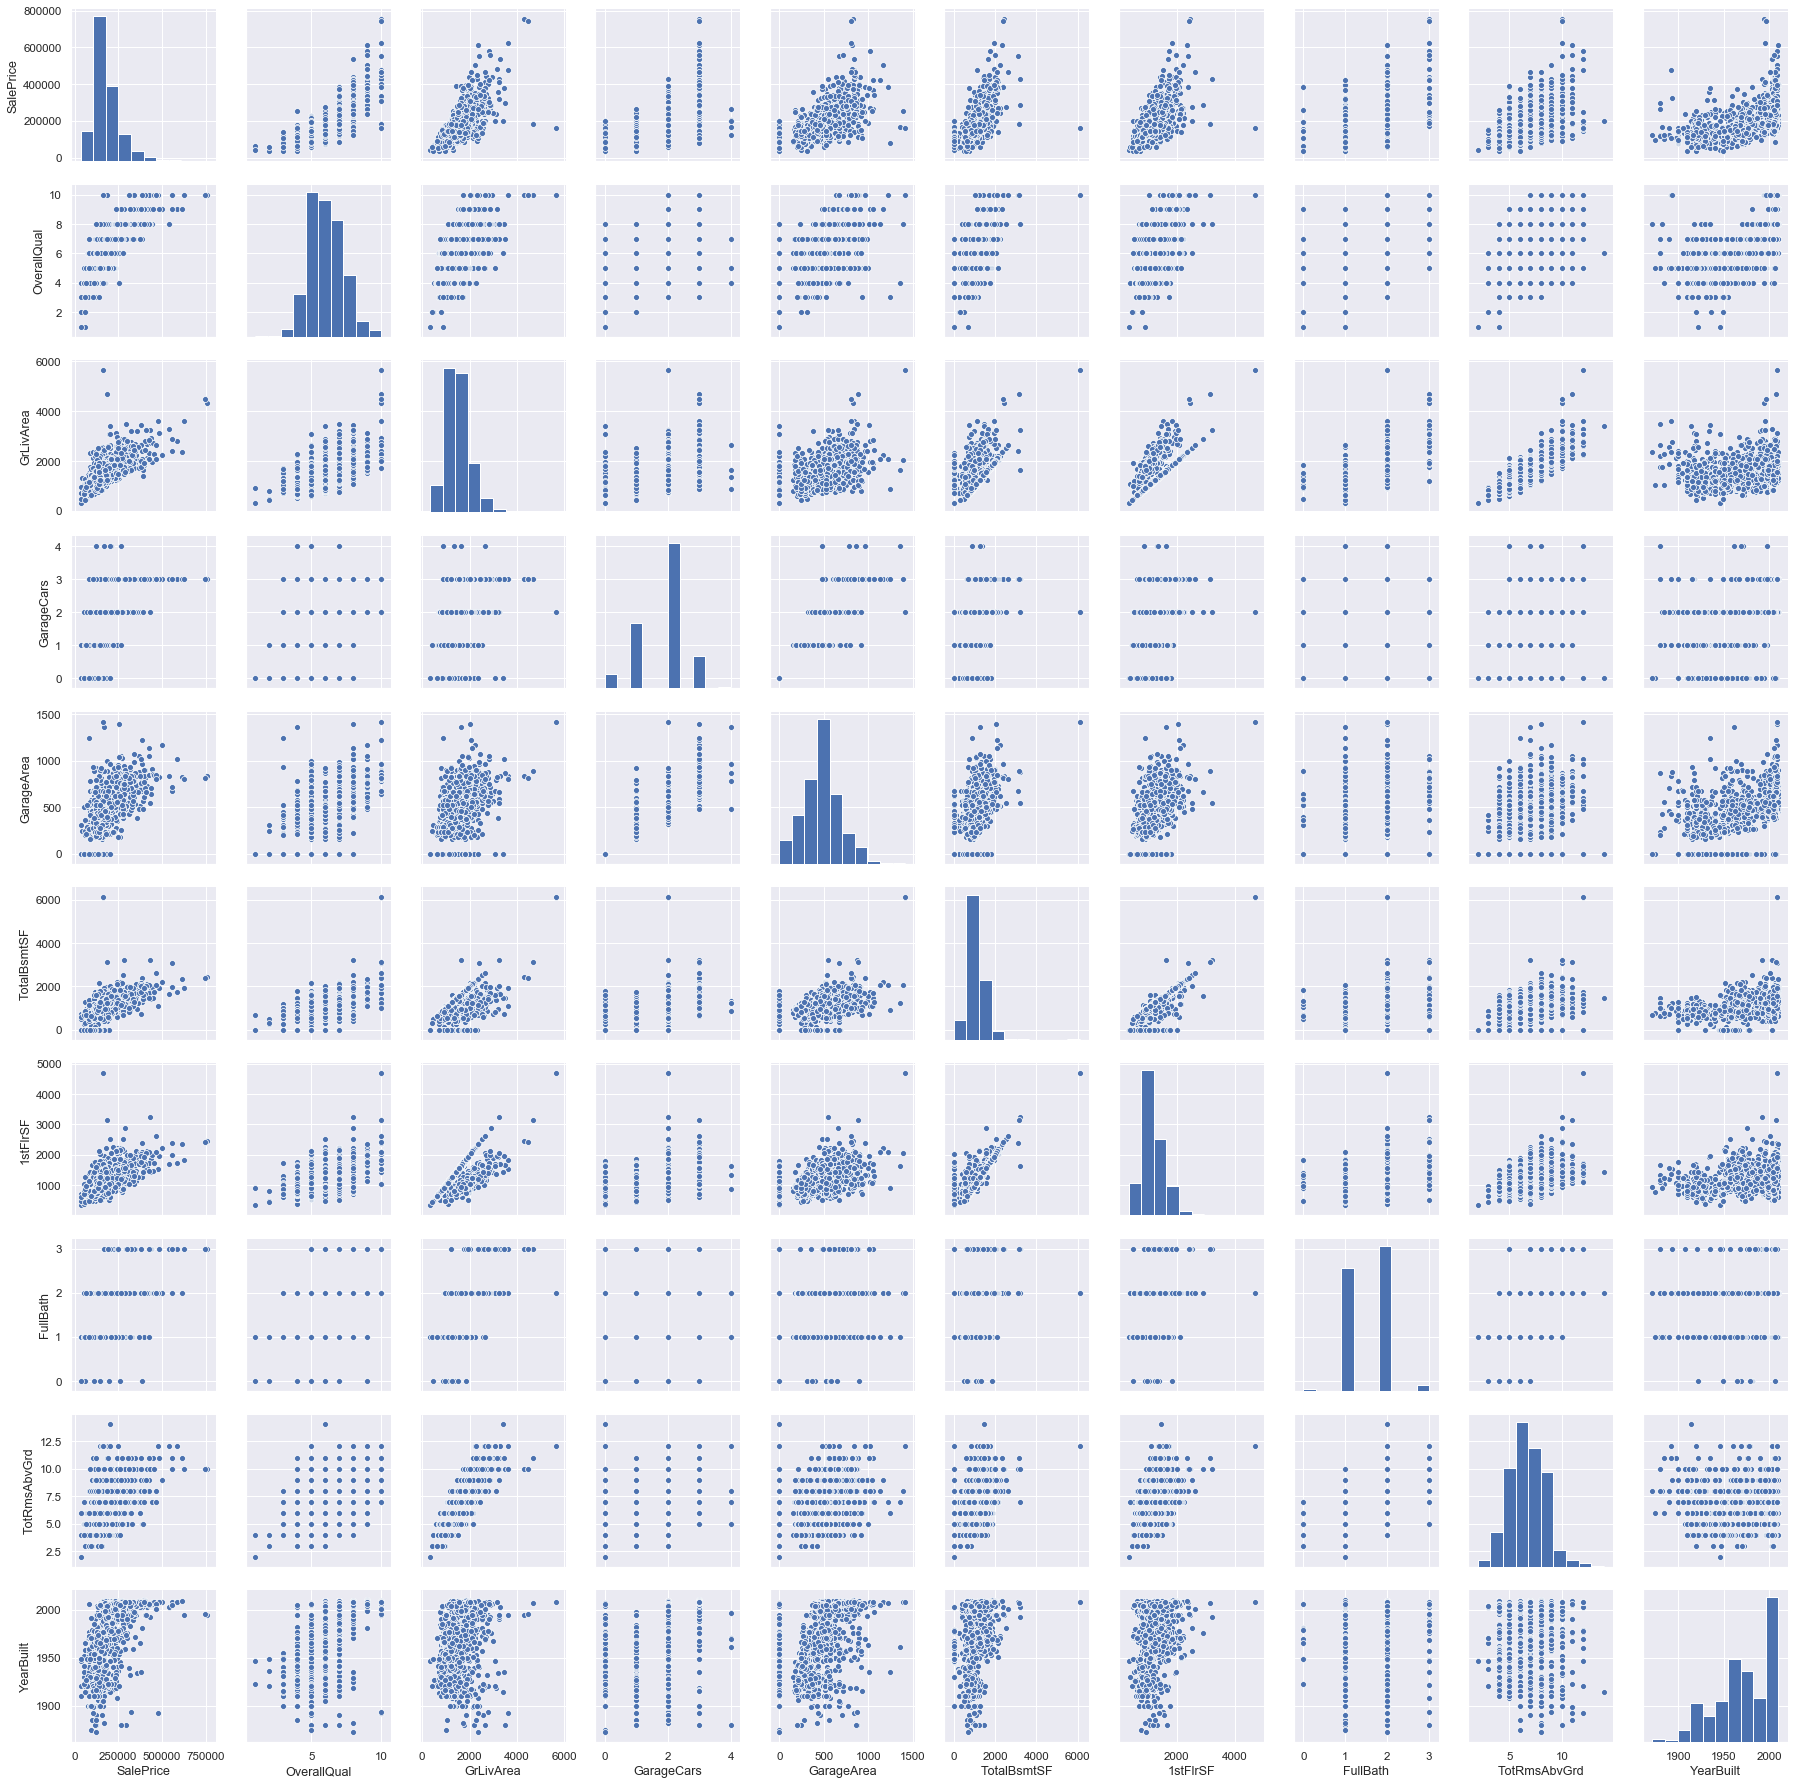

In [574]:
# Lets look at the pairplot of theses variables with SalePrice
corr_cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', \
             'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(housing_df[corr_cols], height=2.5)
plt.show()

### 2.1 Analyse categorical columns 

### Data Imbalance check

In [575]:
# Analysing all categorical columns and their sub categories
for col in categorical_columns_lst:
    print('*** Feature  --',col)
    print('*'*30)
    print(100*(housing_df[col].astype('category').value_counts()/housing_df.shape[0]))
    print('*'*30)

*** Feature  -- MSZoning
******************************
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
******************************
*** Feature  -- Street
******************************
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
******************************
*** Feature  -- Alley
******************************
NA      93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64
******************************
*** Feature  -- LotShape
******************************
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
******************************
*** Feature  -- LandContour
******************************
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
******************************
*** Feature  -- Utilities
******************************
AllPub    99.931507
NoSeWa

In [576]:
not_bal_cat_cols_to_drop = ['Street', 'Alley', 'Condition2', 'Utilities', 'RoofMatl', 'CentralAir', 'PoolQC','MiscFeature']

8


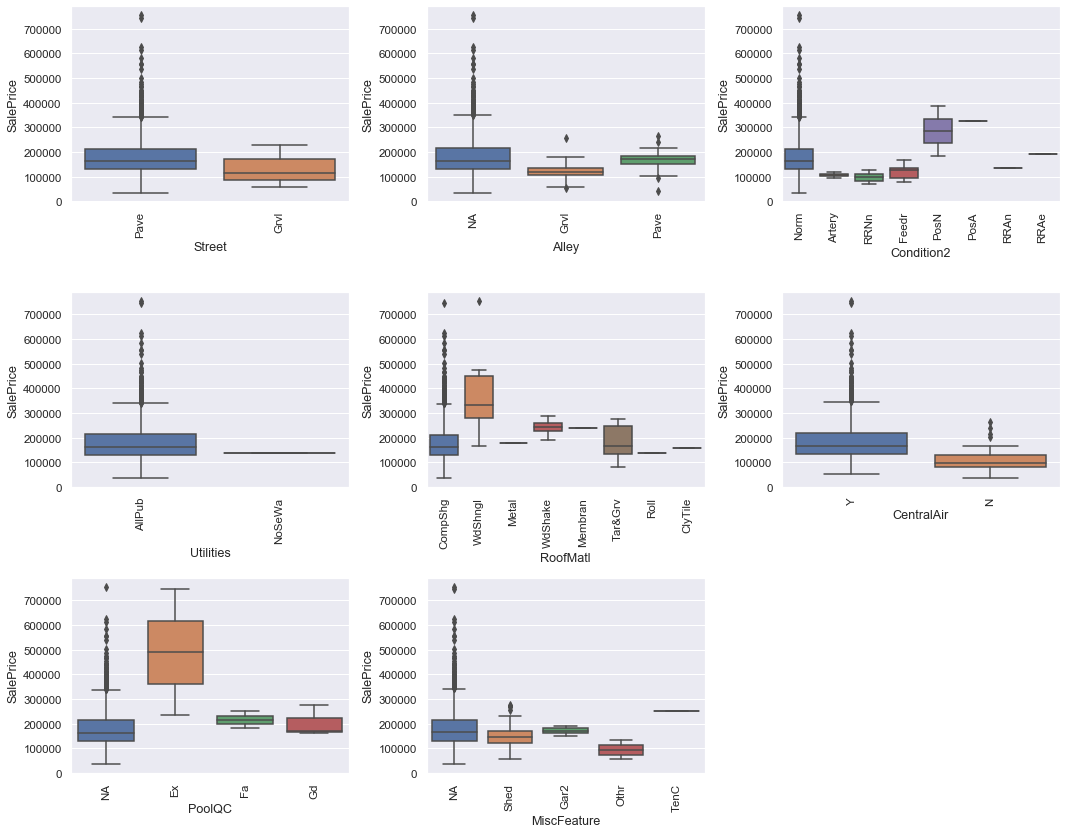

In [577]:
# Analyse the variables before dropping them
def boxplot_for_cols(colmn_list):
    plt.figure(figsize = (15,15))
    print(len(colmn_list))
    i = 1
    for x in colmn_list:
        plt.subplot(len(colmn_list)//2,3,i)
        sns.boxplot(y='SalePrice',x=x,data=housing_df)
        plt.xticks(rotation = 'vertical')
        i = i+1
    plt.tight_layout()
    plt.show()

boxplot_for_cols(not_bal_cat_cols_to_drop)

#### The variable 'Street', 'Alley','Utilities', 'CentralAir', 'MiscFeature' does not have much significance for SalePrice, hence dropping them.
#### PosN  count is only 0.13% of the 'Condition2' variable
#### WdShngl count is only  0.41% of the 'RoofMatl' variable
#### Ex count is only 0.13% of the 'Ex' variable
#### Hence dropping all these columns



In [578]:
# Dropping the following unbalanced data columns
housing_df.drop(not_bal_cat_cols_to_drop, axis=1,inplace=True)

In [579]:
housing_df.shape

(1460, 73)

In [580]:
# Replace Valid NA with valid string
housing_df['MasVnrType'] = housing_df['MasVnrType'].replace('None', 'No_MasVnrType')
housing_df['MasVnrType'] = housing_df['MasVnrType'].replace('NA', 'No_MasVnrType')
housing_df['BsmtQual'] = housing_df['BsmtQual'].replace('NA', 'No_Basement')
housing_df['BsmtCond'] = housing_df['BsmtCond'].replace('NA', 'No_Basement')
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].replace('NA', 'No_Basement')
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].replace('NA', 'No_Basement')
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].replace('NA', 'No_Basement')
housing_df['GarageType'] = housing_df['GarageType'].replace('NA', 'No_Garage')
housing_df['GarageFinish'] = housing_df['GarageFinish'].replace('NA', 'No_Garage')
housing_df['GarageQual'] = housing_df['GarageQual'].replace('NA', 'No_Garage')
housing_df['GarageCond'] = housing_df['GarageCond'].replace('NA', 'No_Garage')
housing_df['Fence'] = housing_df['Fence'].replace('NA', 'No_Fence')
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].replace('NA', 'No_Fireplace')

# Check if there is any categorical column with 'NA' string
cat_cols_with_na = []
catgorical_tmp_lst = list(housing_df.select_dtypes(exclude = ['int64', 'float64']).columns)
for col_name in catgorical_tmp_lst:
    if housing_df[col_name].str.contains(pat = r'^(NA)$', regex=True).sum() > 0:
        cat_cols_with_na.append(col_name)
print(cat_cols_with_na)

['MasVnrArea', 'Electrical', 'GarageYrBlt']


In [581]:
housing_df['GarageYrBlt'].isnull().sum()

0

In [582]:
housing_df['MasVnrArea'] = pd.to_numeric(housing_df['MasVnrArea'], errors = 'coerce')
housing_df['GarageYrBlt'] = pd.to_numeric(housing_df['GarageYrBlt'], errors = 'coerce')
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mean())

In [583]:
# Delete the row with NA in 'electrical' variable
housing_df.drop(housing_df.loc[housing_df['Electrical']=='NA'].index, inplace=True)
housing_df['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [584]:
# Create and add derived columns
# Derived house Age from defference between year built and year sold of house
housing_df['HouseAge'] = housing_df['YrSold'] -  housing_df['YearBuilt']

# Deriving Garage Age from defference between year Garage built and year sold of house
housing_df['GarageAge'] = housing_df['YrSold'] - housing_df['GarageYrBlt']

# Age of house after remodelling
housing_df['RemodAddAge'] = housing_df['YrSold'] - housing_df['YearRemodAdd']

In [585]:
housing_df[housing_df.YrSold < housing_df.YearRemodAdd][['YearBuilt','YearRemodAdd','YrSold']]

YearBuilt  YearRemodAdd  YrSold
523       2007          2008    2007

In [586]:
housing_df.drop(523,inplace = True)

In [587]:
# Drop the original columns
housing_df.drop(['GarageYrBlt', 'YrSold',  'YearRemodAdd','YearBuilt'], axis=1, inplace=True)

In [588]:
housing_df.shape

(1458, 72)

### Non Categorical(numerical)  Variables Analysis

In [589]:
numerical_cols_list = list(housing_df.select_dtypes(exclude = ['object']).columns)

for col in numerical_cols_list:
    print('*** Feature  --',col)
    print('*'*30)
    print(100*(housing_df[col].astype('category').value_counts()/housing_df.shape[0]))
    print('*'*30)

*** Feature  -- Id
******************************
1460    0.068587
479     0.068587
481     0.068587
482     0.068587
483     0.068587
          ...   
975     0.068587
976     0.068587
977     0.068587
978     0.068587
1       0.068587
Name: Id, Length: 1458, dtype: float64
******************************
*** Feature  -- MSSubClass
******************************
20     36.762689
60     20.438957
50      9.876543
120     5.967078
30      4.732510
160     4.320988
70      4.115226
80      3.909465
90      3.566529
190     2.057613
85      1.371742
75      1.097394
45      0.823045
180     0.685871
40      0.274348
Name: MSSubClass, dtype: float64
******************************
*** Feature  -- LotFrontage
******************************
69.0     18.518519
60.0      9.807956
70.0      4.801097
80.0      4.732510
50.0      3.909465
           ...    
138.0     0.068587
106.0     0.068587
46.0      0.068587
137.0     0.068587
182.0     0.068587
Name: LotFrontage, Length: 110, dtype: float64
*

In [590]:
# Dropping the columns as they have 0 for > 80%
housing_df.drop(['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', ''\
                                'MiscVal', 'MasVnrArea'], axis=1, inplace=True)

In [591]:
# Set the firsy column as index
housing_df.set_index('Id', inplace=True)

### Outlier Treatment

In [592]:
q3 = housing_df['LotArea'].quantile(0.99)
housing_df = housing_df[housing_df.LotArea <= q3]


In [593]:
numerical_cols_list = list(housing_df.select_dtypes(exclude='object').columns)

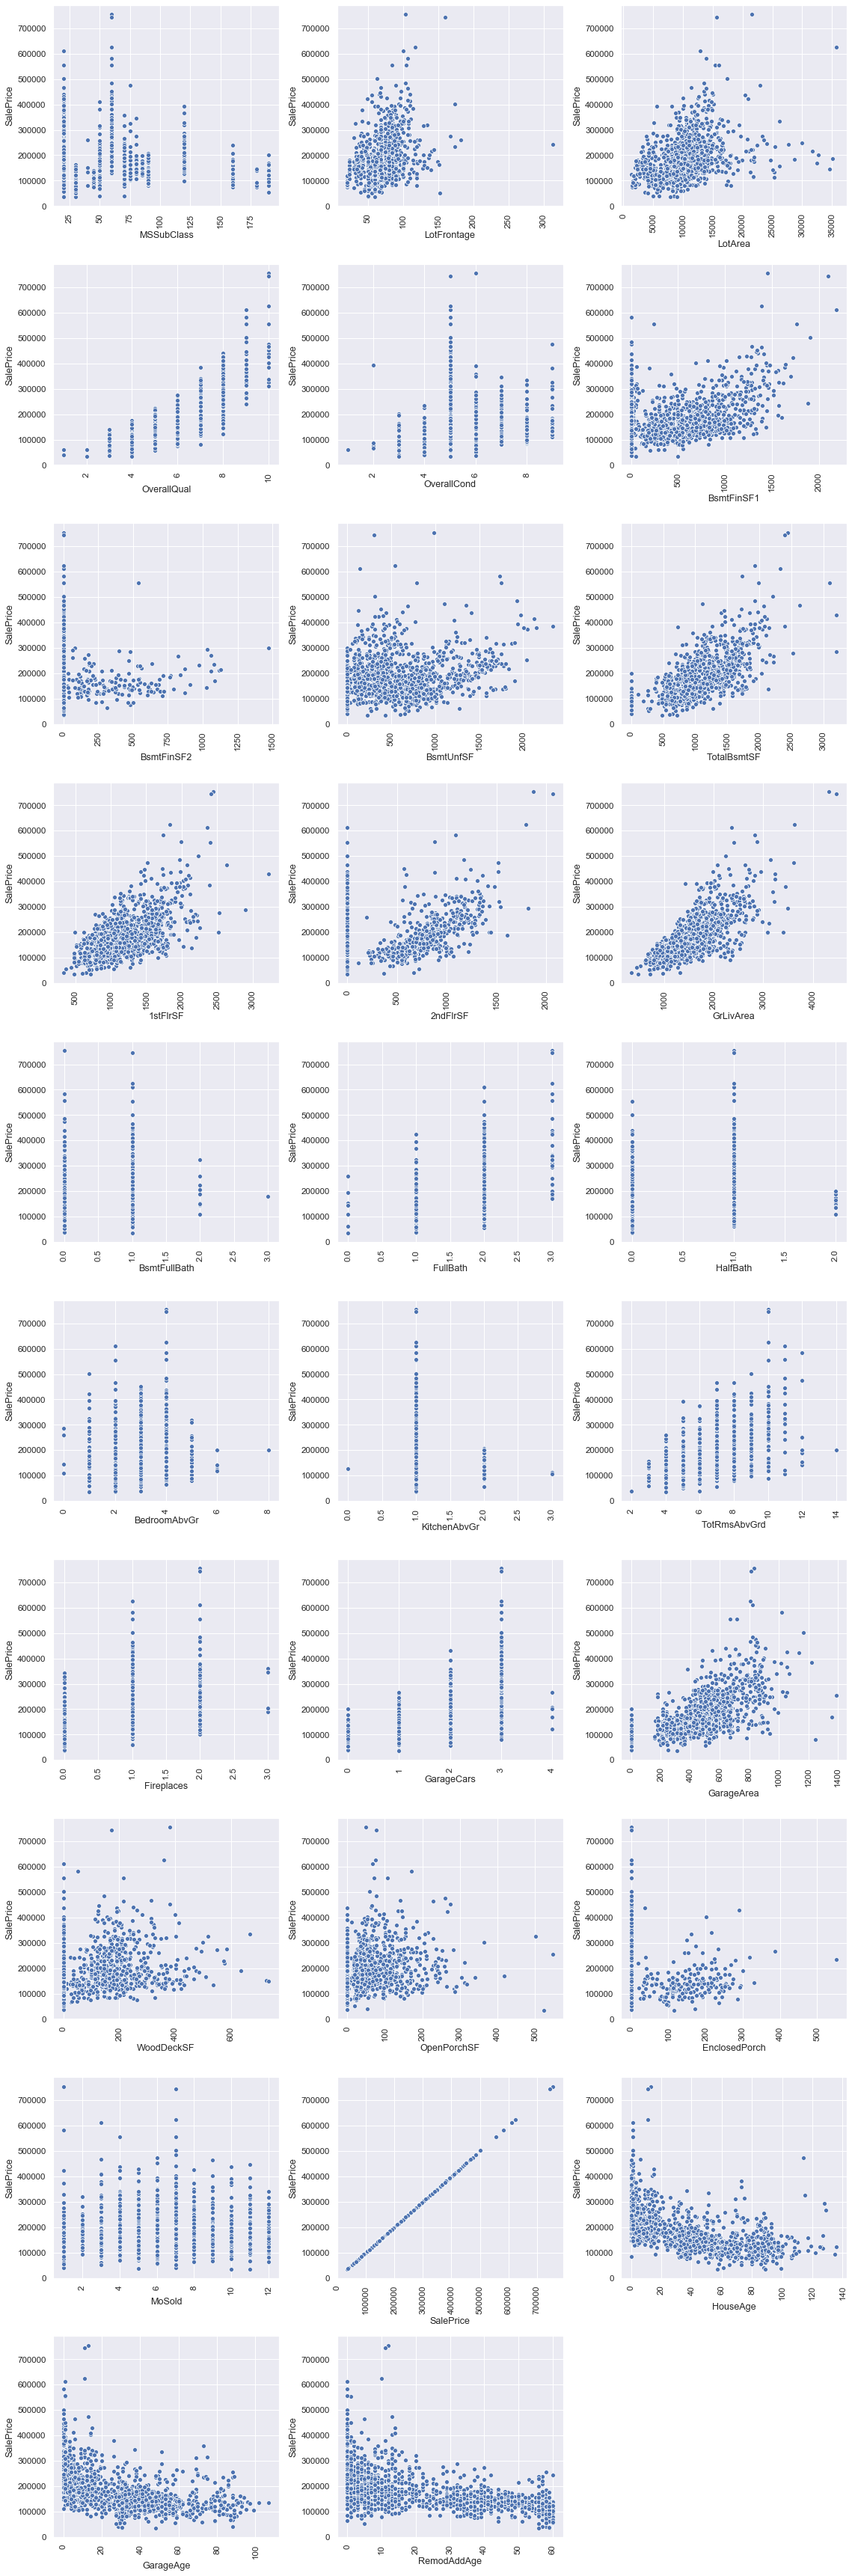

In [594]:
plt.figure(figsize = (16,48))
i = 1
for x in numerical_cols_list :
    plt.subplot(len(numerical_cols_list)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=housing_df)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

In [595]:
housing_df.shape

(1443, 64)

In [596]:
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
Id                                                                             
1           60       RL         65.0     8450      Reg         Lvl    Inside   
2           20       RL         80.0     9600      Reg         Lvl       FR2   
3           60       RL         68.0    11250      IR1         Lvl    Inside   
4           70       RL         60.0     9550      IR1         Lvl    Corner   
5           60       RL         84.0    14260      IR1         Lvl       FR2   

   LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
Id                                                                      
1        Gtl      CollgCr       Norm     1Fam     2Story            7   
2        Gtl      Veenker      Feedr     1Fam     1Story            6   
3        Gtl      CollgCr       Norm     1Fam     2Story            7   
4        Gtl      Crawfor       Norm     1Fam     2Story            7   
5        Gtl      NoRidge       Norm     1Fam     2Story            8   

    OverallCond RoofStyle Exterior1st Exterior2nd     MasVnrType ExterQual  \
Id                                                                           
1             5     Gable     VinylSd     VinylSd        BrkFace        Gd   
2             8     Gable     MetalSd     MetalSd  No_MasVnrType        TA   
3             5     Gable     VinylSd     VinylSd        BrkFace        Gd   
4             5     Gable     Wd Sdng     Wd Shng  No_MasVnrType        TA   
5             5     Gable     VinylSd     VinylSd        BrkFace        Gd   

   ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                    
1         TA      PConc       Gd       TA           No          GLQ   
2         TA     CBlock       Gd       TA           Gd          ALQ   
3         TA      PConc       Gd       TA           Mn          GLQ   
4         TA     BrkTil       TA       Gd           No          ALQ   
5         TA      PConc       Gd       TA           Av          GLQ   

    BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
Id                                                                        
1          706          Unf           0        150          856    GasA   
2          978          Unf           0        284         1262    GasA   
3          486          Unf           0        434          920    GasA   
4          216          Unf           0        540          756    GasA   
5          655          Unf           0        490         1145    GasA   

   HeatingQC Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
Id                                                                     
1         Ex      SBrkr       856       854       1710             1   
2         Ex      SBrkr      1262         0       1262             0   
3         Ex      SBrkr       920       866       1786             1   
4         Gd      SBrkr       961       756       1717             1   
5         Ex      SBrkr      1145      1053       2198             1   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
Id                                                                             
1          2         1             3             1          Gd             8   
2          2         0             3             1          TA             6   
3          2         1             3             1          Gd             6   
4          1         0             3             1          Gd             7   
5          2         1             4             1          Gd             9   

   Functional  Fireplaces   FireplaceQu GarageType GarageFinish  GarageCars  \
Id                                                                            
1         Typ           0  No_Fireplace     Attchd          RFn           2   
2         Typ           1            TA     Attchd       

In [597]:
# Convert categorical list subcategories to dummy variables
categorical_col_lst = list(housing_df.select_dtypes(exclude=(['int64', 'float64'])).columns)
print(categorical_col_lst)
def create_dummies(col_name, updated_df):
    # Creating a dummy variable and dropping the first one.
    cont = pd.get_dummies(updated_df[col_name],prefix=col_name,drop_first=True)
    # Adding the results to the master dataframe
    edu_data_1 = pd.concat([updated_df,cont],axis=1)
    # lead_data_1.head()
    return edu_data_1
    
update_df = housing_df
for col in categorical_col_lst:
    new_df = create_dummies(col, update_df)
    update_df = new_df
update_df.head()

# Drop the original categorical columns
housing_data_dummy_var_df =update_df.drop(categorical_col_lst, axis = 1) 
housing_data_dummy_var_df.head()

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  BsmtFinSF1  \
Id                                                                           
1           60         65.0     8450            7            5         706   
2           20         80.0     9600            6            8         978   
3           60         68.0    11250            7            5         486   
4           70         60.0     9550            7            5         216   
5           60         84.0    14260            8            5         655   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
Id                                                                      
1            0        150          856       856       854       1710   
2            0        284         1262      1262         0       1262   
3            0        434          920       920       866       1786   
4            0        540          756       961       756       1717   
5            0        490         1145      1145      1053       2198   

    BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
Id                                                                 
1              1         2         1             3             1   
2              0         2         0             3             1   
3              1         2         1             3             1   
4              1         1         0             3             1   
5              1         2         1             4             1   

    TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                              
1              8           0           2         548           0           61   
2              6           1           2         460         298            0   
3              6           1           2         608           0           42   
4              7           1           3         642           0           35   
5              9           1           3         836         192           84   

    EnclosedPorch  MoSold  SalePrice  HouseAge  GarageAge  RemodAddAge  \
Id                                                                       
1               0       2     208500         5        5.0            5   
2               0       5     181500        31       31.0           31   
3               0       9     223500         7        7.0            6   
4             272       2     140000        91        8.0           36   
5               0      12     250000         8        8.0            8   

    MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
Id                                                                     
1             0            0            1            0             0   
2             0            0            1            0             0   
3             0            0            1            0             0   
4             0            0            1            0             0   
5             0            0            1            0             0   

    LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
Id                                                                 
1              0             1                0                0   
2              0             1                0                0   
3              0             0                0                0   
4              0             0                0                0   
5              0             0                0                0   

    LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                     
1                 1                  0              0              0   
2                 1                  0              1              0   
3                 1                  0              0              0   
4                 1                  0 

In [598]:
housing_data_dummy_var_df.shape

(1443, 226)

In [599]:
# Drop top significant variables for assignment II
#top_sig_var_lst = ['GrLivArea', 'OverallQual', 'OverallCond', 'SaleType_New', 'TotalBsmtSF']
#housing_data_dummy_var_df.drop(top_sig_var_lst, axis=1, inplace=True)

In [600]:
housing_data_dummy_var_df.shape

(1443, 226)

### Analysing Target Variable(SalePrice)

In [601]:
# Check the target variable
housing_data_dummy_var_df['SalePrice'].describe()

count      1443.000000
mean     179845.631324
std       78549.134521
min       34900.000000
25%      129700.000000
50%      162000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

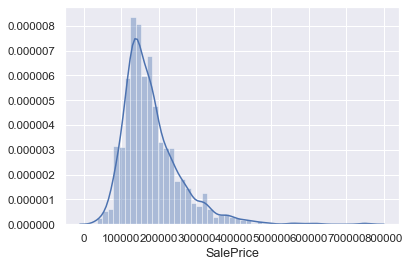

In [602]:
sns.distplot(housing_data_dummy_var_df['SalePrice'])

#### 'SalesPrice' is  positively skewed

In [603]:
# Checking if target variable is skewed.
print('Skewness:',housing_data_dummy_var_df.SalePrice.skew())
print('Kurtosis:',housing_data_dummy_var_df.SalePrice.kurt())

Skewness: 1.9017574847294867
Kurtosis: 6.791899661591124


Skewness > +1 - Hence the SalePrice is  highly skewed

Kurtosis > +3 - SalePrice has heavior tails than the normal distribution

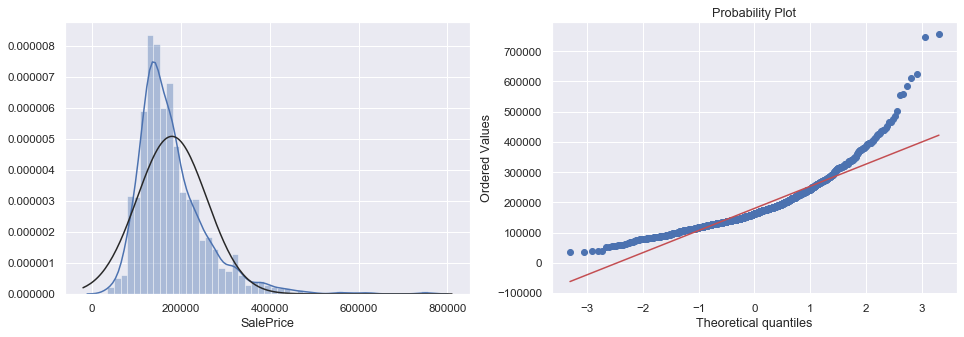

In [604]:
from scipy.stats import norm
from scipy.stats import probplot

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing_data_dummy_var_df.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(housing_data_dummy_var_df.SalePrice,plot = plt)
plt.show()

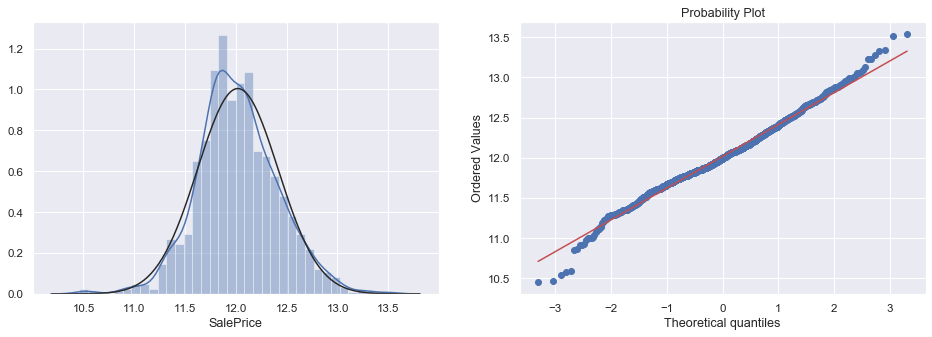

In [605]:
# Applying log transformation on the target variable
housing_data_dummy_var_df['SalePrice'] = np.log(housing_data_dummy_var_df['SalePrice'])

# Plot Target Variable(salePrice)
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing_data_dummy_var_df.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(housing_data_dummy_var_df.SalePrice,plot = plt)
plt.show()

### Split Data into Train and Test data

In [606]:
housing_data_final = housing_data_dummy_var_df.copy()

In [607]:
# Putting the Response variable to y
y = housing_data_dummy_var_df['SalePrice']

# Putting the feature variable to X
X = housing_data_dummy_var_df.drop(['SalePrice'], axis=1)

### Feature Scaling

In [608]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=225)

In [609]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  BsmtFinSF1  \
517   -0.874626     0.017636  0.847037    -0.793255     1.279631   -0.133409   
160    0.071110     1.920336  0.939826     2.113837    -0.515709    1.354706   
452    0.071110     0.255473 -0.419488     1.387064    -0.515709    0.255503   
545    0.071110     0.731149  0.207317     0.660291    -0.515709    1.005383   
106   -0.874626    -0.933714 -0.898740    -0.793255    -0.515709   -0.769177   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
517   -0.286231  -0.040777    -0.292202 -0.612451 -0.794646  -1.142031   
160   -0.286231  -0.029482     1.267230  1.125973  1.727247   2.295055   
452   -0.286231  -0.634934    -0.524663 -0.871595  1.743354   0.847133   
545   -0.286231  -0.987362    -0.122698 -0.401897  1.598391   1.066396   
106    0.780789  -0.119848    -0.628787 -0.987670 -0.794646  -1.416603   

     BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
517     -0.816544 -1.026717 -0.760772     -1.066808     -0.212752   
160      1.134240  0.802361  1.227986      0.165701     -0.212752   
452      1.134240  0.802361  1.227986      0.165701     -0.212752   
545      1.134240  0.802361  1.227986      0.165701     -0.212752   
106     -0.816544 -1.026717 -0.760772     -1.066808     -0.212752   

     TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
517     -1.555094   -0.948522   -1.017796   -1.031561    1.390365   
160      2.171450    2.201574    1.654960    1.199629    2.533999   
452      0.929269   -0.948522    0.318582    0.380584   -0.757035   
545      0.929269    0.626526    1.654960    1.882166    1.875792   
106     -0.934003   -0.948522   -1.017796   -1.040975   -0.757035   

     OpenPorchSF  EnclosedPorch    MoSold  HouseAge  GarageAge  RemodAddAge  \
517    -0.706115       2.179200 -0.117955  0.476198   0.905211    -0.775513   
160    -0.706115      -0.361156 -1.228017 -1.042592  -1.010739    -0.920803   
452     1.594423      -0.361156  2.102169 -1.207677  -1.218994    -1.114521   
545     0.244774      -0.361156  0.622086 -1.042592  -1.010739    -0.920803   
106    -0.706115      -0.361156 -0.857997  0.773352   1.280071     1.694403   

     MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
517    -0.217186    -0.105888     0.522003    -0.421852     -0.157664   
160    -0.217186    -0.105888     0.522003    -0.421852     -0.157664   
452     4.604346    -0.105888    -1.915699    -0.421852     -0.157664   
545    -0.217186    -0.105888     0.522003    -0.421852     -0.157664   
106    -0.217186    -0.105888    -1.915699     2.370499     -0.157664   

     LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
517     -0.074665      0.749459        -0.185496        -0.138086   
160     -0.074665     -1.334296        -0.185496        -0.138086   
452     -0.074665     -1.334296        -0.185496        -0.138086   
545     -0.074665      0.749459        -0.185496        -0.138086   
106     -0.074665      0.749459        -0.185496        -0.138086   

     LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
517          0.31995          -0.254842      -0.183487      -0.052723   
160          0.31995          -0.254842      -0.183487      -0.052723   
452          0.31995          -0.254842      -0.183487      -0.052723   
545          0.31995          -0.254842      -0.183487      -0.052723   
106          0.31995          -0.254842      -0.183487      -0.052723   

     LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
517           0.61821      -0.208288      -0.069819             -0.037255   
160           0.61821      -0.208288      -0.069819             -0.037255   
452           0.61821      -0.208288      -0.069819             -0.037255   
545           0.61821      -0.208288      -0.069819             -0.037255   
106           0.61821      -0.208288      -0.069819             -0.037255   

     Neighborhood_

In [610]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=225)

## 3. Model Building and Evaluation

### Ridge and Lasso Regression

### Ridge Regression
Using RFE for Ridge Regression to select important features, and hence to reduce the number of variables.

In [611]:
lm = LinearRegression()

# Using RFE to select highly important 50 features
rfe = RFE(lm, 50)             # running RFE with 50 variables as output
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 161),
 ('LotFrontage', False, 17),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 43),
 ('HalfBath', False, 53),
 ('BedroomAbvGr', False, 99),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 132),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 65),
 ('WoodDeckSF', False, 16),
 ('OpenPorchSF', False, 54),
 ('EnclosedPorch', False, 44),
 ('MoSold', False, 131),
 ('HouseAge', True, 1),
 ('GarageAge', False, 136),
 ('RemodAddAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 172),
 ('LotShape_IR3', False, 151),
 ('LotShape_Reg', False, 143),
 ('LandContour_HLS', False, 84),
 ('LandConto

In [612]:
col50 = X_train.columns[rfe.support_]
col50

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'HouseAge', 'RemodAddAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_Low', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm',
       'BldgType_Twnhs', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_BrkFace', 'Foundation_PConc', 'BsmtCond_No_Basement',
       'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_No_Basement', 'Heating_Grav', 'Electrical_Mix',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Typ',
       'GarageType_No_Garage', 'GarageFinish_No_Garage', 'GarageQual_Fa',
       'GarageQual_No_Garage', 'GarageQual_TA', 'GarageCond_No_Garage',
       'SaleType_ConLD', 'SaleType_New', 'SaleCondition_Normal'],
      dty

In [613]:
X_train_final = X_train[col50]

In [614]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [615]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.000000      0.000000         0.000000        0.000000      0.0001   
1       0.000000      0.000000         0.006249        0.007653       0.001   
2       0.001302      0.002603         0.000000        0.000000        0.01   
3       0.003124      0.006249         0.000000        0.000000        0.05   
4       0.000000      0.000000         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.073921          -0.078917          -0.082394   
1   {'alpha': 0.001}          -0.073921          -0.078917          -0.082394   
2    {'alpha': 0.01}          -0.073922          -0.078916          -0.082391   
3    {'alpha': 0.05}          -0.073926          -0.078913          -0.082382   
4     {'alpha': 0.1}          -0.073931          -0.078909          -0.082369   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.080873          -0.071654        -0.077552        0.004106   
1          -0.080873          -0.071654        -0.077552        0.004106   
2          -0.080871          -0.071653        -0.077551        0.004105   
3          -0.080864          -0.071650        -0.077547        0.004102   
4          -0.080856          -0.071646        -0.077542        0.004098   

   rank_test_score  split0_train_score  split1_train_score  \
0               25           -0.073223           -0.071422   
1               24           -0.073223           -0.071422   
2               23           -0.073223           -0.071422   
3               22           -0.073222           -0.071422   
4               21           -0.073221           -0.071423   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.071087           -0.071736           -0.073648   
1           -0.071087           -0.071736           -0.073648   
2           -0.071087           -0.071737           -0.073648   
3           -0.071087           -0.071738           -0.073649   
4           -0.071087           -0.071740           -0.073649   

   mean_train_score  std_train_score  
0         -0.072224         0.001020  
1         -0.072224         0.001020  
2         -0.072224         0.001020  
3         -0.072224         0.001020  
4         -0.072224         0.001019

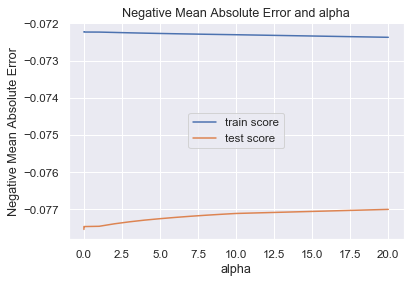

In [616]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='center')
plt.show()

In [617]:
print(model_cv.best_params_)

{'alpha': 20}


#### Note:  Optimum value of alpha for Ridge regression  is 20

In [618]:
alpha = 20

ridge = Ridge(alpha=alpha)

ridge.fit(X_train_final, y_train)
ridge.coef_

array([ 0.03071196,  0.0786085 ,  0.04791109,  0.03220004,  0.00612742,
        0.0367709 ,  0.04858435,  0.05468049,  0.07713819,  0.01699122,
       -0.01823866,  0.01592599,  0.03805997, -0.06449795, -0.01732022,
        0.02749044,  0.00678405,  0.03246666,  0.01154191, -0.01186864,
        0.02389935, -0.01196087,  0.01239045,  0.01055438,  0.02095163,
       -0.01232882, -0.01069309, -0.01044516,  0.01462911,  0.02389866,
        0.00184728, -0.00171038,  0.01037896,  0.01702961,  0.00184728,
       -0.01595201, -0.00241801, -0.01278977, -0.0327034 , -0.03642165,
        0.01679072, -0.00411116, -0.00411116, -0.01399873, -0.00411116,
       -0.01734994, -0.00411116,  0.00767571,  0.04190311,  0.03066343])

In [619]:
Y_train_ridge = y_train.copy()

In [620]:
from sklearn.metrics import r2_score
model_ridge=ridge.fit(X_train_final, Y_train_ridge)
# predict
y_train_pred = ridge.predict(X_train_final)
print(model_ridge.score(X_train_final, Y_train_ridge))
print(r2_score(y_true=Y_train_ridge, y_pred=y_train_pred))

0.9341016032038938
0.9341016032038937


In [621]:
X_test_ridge = X_test[col50]
Y_test_ridge = y_test.copy()

In [622]:
y_test_pred = ridge.predict(X_test_ridge)
print(model_ridge.score(X_test_ridge, Y_test_ridge))
print(r2_score(y_true=Y_test_ridge, y_pred=y_test_pred))

0.9012841327350486
0.9012841327350486


#### r2 score on train data  (Ridge regression) - 93.2%
#### r2 score on test data (Ridge regression) - 90.5%

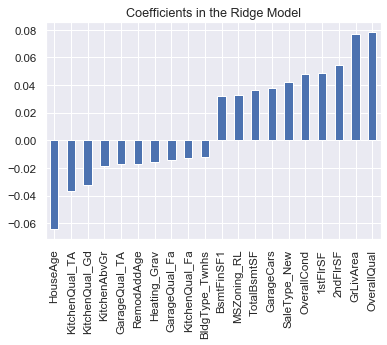

In [623]:
# Plot important coefficients

coefs = pd.Series(ridge.coef_, index = X_train_final.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Ridge Model")

plt.show()

In [624]:
coefs.sort_values().head(10)

HouseAge         -0.064498
KitchenQual_TA   -0.036422
KitchenQual_Gd   -0.032703
KitchenAbvGr     -0.018239
GarageQual_TA    -0.017350
RemodAddAge      -0.017320
Heating_Grav     -0.015952
GarageQual_Fa    -0.013999
KitchenQual_Fa   -0.012790
BldgType_Twnhs   -0.012329
dtype: float64

In [625]:
coefs.sort_values().tail(10)

BsmtFinSF1      0.032200
MSZoning_RL     0.032467
TotalBsmtSF     0.036771
GarageCars      0.038060
SaleType_New    0.041903
OverallCond     0.047911
1stFlrSF        0.048584
2ndFlrSF        0.054680
GrLivArea       0.077138
OverallQual     0.078608
dtype: float64

In [626]:
ridge_df = pd.DataFrame() 
ridge_df['Coeff Values'] = pd.Series(ridge.coef_) 
ridge_df['Variables'] = X_train_final.columns

# Removing rows that have coeff = 0
ridge_df = ridge_df.loc[ridge_df['Coeff Values']!=0]

ridge_df['Absolute Coefficent'] =ridge_df['Coeff Values'].apply(lambda x:abs(x))
ridge_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

print(ridge_df.head(20))

    Coeff Values             Variables  Absolute Coefficent
1       0.078608           OverallQual             0.078608
8       0.077138             GrLivArea             0.077138
13     -0.064498              HouseAge             0.064498
7       0.054680              2ndFlrSF             0.054680
6       0.048584              1stFlrSF             0.048584
2       0.047911           OverallCond             0.047911
48      0.041903          SaleType_New             0.041903
12      0.038060            GarageCars             0.038060
5       0.036771           TotalBsmtSF             0.036771
39     -0.036422        KitchenQual_TA             0.036422
38     -0.032703        KitchenQual_Gd             0.032703
17      0.032467           MSZoning_RL             0.032467
3       0.032200            BsmtFinSF1             0.032200
0       0.030712               LotArea             0.030712
49      0.030663  SaleCondition_Normal             0.030663
15      0.027490           MSZoning_FV  

#### Top 10 features which increases the price of the property price(using Ridge regression) are: 
OverallQual,GrLivArea,2ndFlrSF,1stFlrSF,OverallCond,SaleType_New,GarageCars,TotalBsmtSF,MSZoning_RL,BsmtFinSF1 

#### Top 10 features which decreases the price of the property price((using Ridge regression) are:
HouseAge, RemodAddAge, KitchenQual_TA ,BsmtQual_Gd, BsmtQual_TA, KitchenQual_Gd, KitchenAbvGr,Heating_Grav, GarageQual_TA, BldgType_Twnhs 


### Lasso Regression


In [627]:
# Allowing Lasso to select top 50 features
X_train_lasso = X_train[col50]

In [628]:
lasso = Lasso()
folds = 10

params = {'alpha': [0.0001, 0.001,0.002,0.003,0.005,0.008]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.008]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [629]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.014707      0.005273         0.002213        0.004874      0.0001   
1       0.013076      0.005086         0.000400        0.001200       0.001   
2       0.006500      0.007990         0.000000        0.000000       0.002   
3       0.003124      0.006248         0.001562        0.004687       0.003   
4       0.003125      0.006250         0.001563        0.004689       0.005   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.075503          -0.072730          -0.073486   
1   {'alpha': 0.001}          -0.077339          -0.073138          -0.072877   
2   {'alpha': 0.002}          -0.079752          -0.073371          -0.072597   
3   {'alpha': 0.003}          -0.082062          -0.073791          -0.072295   
4   {'alpha': 0.005}          -0.085194          -0.073814          -0.072063   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.085537          -0.078950          -0.083408          -0.065398   
1          -0.085762          -0.077821          -0.083337          -0.064071   
2          -0.086728          -0.078036          -0.085789          -0.064094   
3          -0.088191          -0.079512          -0.088093          -0.063953   
4          -0.089790          -0.081803          -0.090317          -0.064220   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.096432          -0.069658          -0.073800        -0.077490   
1          -0.096335          -0.069588          -0.073638        -0.077391   
2          -0.096102          -0.070431          -0.073418        -0.078032   
3          -0.095832          -0.071037          -0.074100        -0.078887   
4          -0.094653          -0.071908          -0.074996        -0.079876   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.008512                2           -0.072639           -0.073197   
1        0.008691                1           -0.072996           -0.073673   
2        0.008887                3           -0.073505           -0.074196   
3        0.009197                4           -0.074395           -0.075171   
4        0.009423                5           -0.076004           -0.076438   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.072940           -0.071403           -0.072408   
1           -0.073453           -0.072186           -0.072916   
2           -0.074130           -0.072905           -0.073475   
3           -0.075032           -0.074038           -0.074210   
4           -0.076731           -0.075626           -0.075924   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.071779           -0.073644           -0.070988   
1           -0.072571           -0.074398           -0.071470   
2           -0.073141           -0.074956           -0.072134   
3           -0.074048           -0.075938           -0.073152   
4           -0.075351           -0.077566           -0.074566   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.073382           -0.072884         -0.072526         0.000833  
1           -0.073969           -0.073515         -0.073115         0.000829  
2           -0.074516           -0.074245         -0.073720         0.000803  
3           -0.075359           -0.075247         -0.074659         0.000786  
4           -0.076965           -0.076695         -0.076187         0.000829

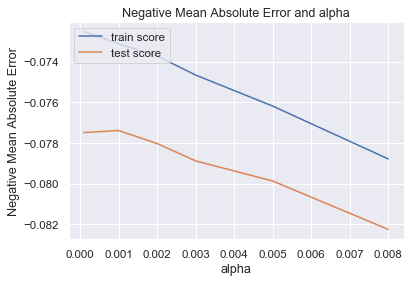

In [630]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [631]:
print(model_cv.best_params_)

{'alpha': 0.001}


#### Note:  Optimum value of alpha for Lasso regression  is 0.001

In [632]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [633]:
(lasso.coef_)

array([ 3.11021270e-02,  8.28931328e-02,  5.04363302e-02,  3.33709809e-02,
        5.47588299e-03,  3.23544450e-02,  5.30434393e-03,  0.00000000e+00,
        1.39818398e-01,  1.60221146e-02, -1.54864425e-02,  1.53681428e-02,
        3.79360581e-02, -6.99424216e-02, -1.45331021e-02,  1.94090589e-02,
        2.20089555e-03,  1.88220813e-02, -0.00000000e+00, -1.00634358e-02,
        2.33066719e-02, -1.10984116e-02,  1.15687414e-02,  8.35547220e-03,
        1.92738135e-02, -1.20676137e-02, -6.15482609e-04, -0.00000000e+00,
        1.39478513e-02,  2.19244018e-02,  3.07864085e-04, -0.00000000e+00,
        8.30417167e-03,  1.60578562e-02,  6.70912320e-06, -1.45016268e-02,
       -1.65035295e-03, -1.02428491e-02, -2.71745357e-02, -3.14358564e-02,
        1.58269897e-02, -4.44968594e-03, -0.00000000e+00, -3.84241853e-03,
       -5.98971083e-08, -2.83279963e-03, -0.00000000e+00,  4.59071034e-03,
        4.20124851e-02,  3.04591847e-02])

In [634]:
list(zip(X_train_lasso.columns,lasso.coef_))

[('LotArea', 0.03110212695881118),
 ('OverallQual', 0.08289313275391608),
 ('OverallCond', 0.05043633018207183),
 ('BsmtFinSF1', 0.033370980878745383),
 ('BsmtFinSF2', 0.005475882986584648),
 ('TotalBsmtSF', 0.03235444497751996),
 ('1stFlrSF', 0.005304343928268584),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 0.1398183976437259),
 ('BsmtFullBath', 0.01602211455825281),
 ('KitchenAbvGr', -0.015486442539262596),
 ('Fireplaces', 0.015368142813376034),
 ('GarageCars', 0.03793605811933736),
 ('HouseAge', -0.06994242161762404),
 ('RemodAddAge', -0.014533102129704356),
 ('MSZoning_FV', 0.01940905888910501),
 ('MSZoning_RH', 0.0022008955530323253),
 ('MSZoning_RL', 0.01882208129144691),
 ('MSZoning_RM', -0.0),
 ('LandContour_Low', -0.010063435752405918),
 ('Neighborhood_Crawfor', 0.02330667189307744),
 ('Neighborhood_MeadowV', -0.011098411588210259),
 ('Neighborhood_StoneBr', 0.011568741376858463),
 ('Condition1_Feedr', 0.008355472200734718),
 ('Condition1_Norm', 0.019273813464896473),
 ('BldgType_Twnh

In [635]:
Y_train_lasso = y_train.copy()

In [636]:
model_lasso=lasso.fit(X_train_lasso, Y_train_lasso)

# predict
y_train_pred = lasso.predict(X_train_lasso)
print(model_lasso.score(X_train_lasso, Y_train_lasso))
print(r2_score(y_true=Y_train_lasso, y_pred=y_train_pred))

0.932970673063431
0.9329706730634308


In [637]:
X_test_lasso = X_test[col50]
Y_test_lasso = y_test.copy()

In [638]:
y_test_pred = lasso.predict(X_test_lasso)
print(model_lasso.score(X_test_lasso, Y_test_lasso))
print(r2_score(y_true=Y_test_lasso, y_pred=y_test_pred))

0.9010690459210298
0.9010690459210298


#### r2 score on train data  (Lasso regression) - 93.1%
#### r2 score on test data (Lasso regression) - 90.4%

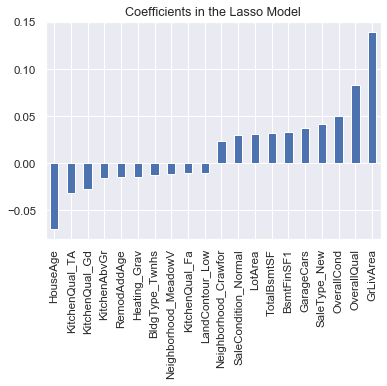

In [639]:
# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train_lasso.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Lasso Model")

plt.show()

In [640]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_lasso.columns

# Removing rows that have coeff = 0
lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

print(lasso_df.head(20))

    Coeff Values             Variables  Absolute Coefficent
8       0.139818             GrLivArea             0.139818
1       0.082893           OverallQual             0.082893
13     -0.069942              HouseAge             0.069942
2       0.050436           OverallCond             0.050436
48      0.042012          SaleType_New             0.042012
12      0.037936            GarageCars             0.037936
3       0.033371            BsmtFinSF1             0.033371
5       0.032354           TotalBsmtSF             0.032354
39     -0.031436        KitchenQual_TA             0.031436
0       0.031102               LotArea             0.031102
49      0.030459  SaleCondition_Normal             0.030459
38     -0.027175        KitchenQual_Gd             0.027175
20      0.023307  Neighborhood_Crawfor             0.023307
29      0.021924      Foundation_PConc             0.021924
15      0.019409           MSZoning_FV             0.019409
24      0.019274       Condition1_Norm  

In [641]:
coefs.sort_values().head(10)

HouseAge               -0.069942
KitchenQual_TA         -0.031436
KitchenQual_Gd         -0.027175
KitchenAbvGr           -0.015486
RemodAddAge            -0.014533
Heating_Grav           -0.014502
BldgType_Twnhs         -0.012068
Neighborhood_MeadowV   -0.011098
KitchenQual_Fa         -0.010243
LandContour_Low        -0.010063
dtype: float64

In [642]:
coefs.sort_values().tail(10)

Neighborhood_Crawfor    0.023307
SaleCondition_Normal    0.030459
LotArea                 0.031102
TotalBsmtSF             0.032354
BsmtFinSF1              0.033371
GarageCars              0.037936
SaleType_New            0.042012
OverallCond             0.050436
OverallQual             0.082893
GrLivArea               0.139818
dtype: float64

#### Top 10 features which increases the price of the property price(using Lasso regression) are:
GrLivArea, OverallQual, OverallCond, SaleType_New, TotalBsmtSF, GarageCars,, BsmtFinSF1, LotArea, SaleCondition_Normal , MSZoning_RL

#### Top 10 features which decreases the price of the property price((using Lasso regression) are:
HouseAge, RemodAddAge, BsmtQual_Gd, KitchenQual_TA ,BsmtQual_TA,  KitchenAbvGr,Heating_Grav, KitchenQual_Gd
BldgType_Twnhs, GarageQual_TA

## Results:

### Ridge Regression:
####   Optimum value of alpha -  20
####   r2 score on train data  - 93.2%
####   r2 score on test data  - 90.5%

#### Top 5 features which increases the price of the property price are:
    OverallQual    -->  Rates the overall material and finish of the house
    GrLivArea      -->  Above grade (ground) living area square feet
    OverallCond    -->  Rates the overall condition of the house
    SaleType_New   -->  Type of sale(New - Home just constructed and sold)
    TotalBsmtSF    -->  Total square feet of basement area
    2ndFlrSF       --> Second floor square feet
    1stFlrSF       --> First floor square feet


#### Top 5  features which decreases the price of the property price are:
     HouseAge        --> Age of the house(derived variable)
     RemodAddAge     --> Age of the house after remodelling(derived variable)
     KitchenQual_TA  --> Kitchen quality (Typical/Average)
     BsmtQual_Gd     --> Height of the basement(Good)
     BsmtQual_TA     --> Height of the basement(Typical)

### Lasso Regression:

#### Optimum value of alpha - 0.001
####  r2 score on train data   - 93.1%
#### r2 score on test data - 90.4%


#### Top 5 features which increases the price of the property price are:
    GrLivArea     --> Above grade (ground) living area square feet
    OverallQual   --> Rates the overall material and finish of the house
    OverallCond   --> Rates the overall condition of the house
    SaleType_New  --> Type of sale(New - Home just constructed and sold)
    TotalBsmtSF   --> Total square feet of basement area

#### Top 5  features which decreases the price of the property price are:
    HouseAge      --> Age of the house(derived variable) 
    RemodAddAge   --> Age of the house after remodelling(derived variable) 
    BsmtQual_Gd   --> Height of the basement(Good) 
    KitchenQual_TA--> Kitchen quality (Typical/Average)
    BsmtQual_TA   --> Height of the basement(Typical)

#### Note: So, the top 5 variables remains same in both Ridge and Lasso regression.

So, company can invest in those areas where the property is satisfied with the following significant variables:
    

In [643]:
significant_numerical_var = ['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageCars',\
                   '2ndFlrSF','1stFlrSF','BsmtFinSF1', 'LotArea'] 
significant_categorical_var = ['SaleType','SaleCondition', 'MSZoning']

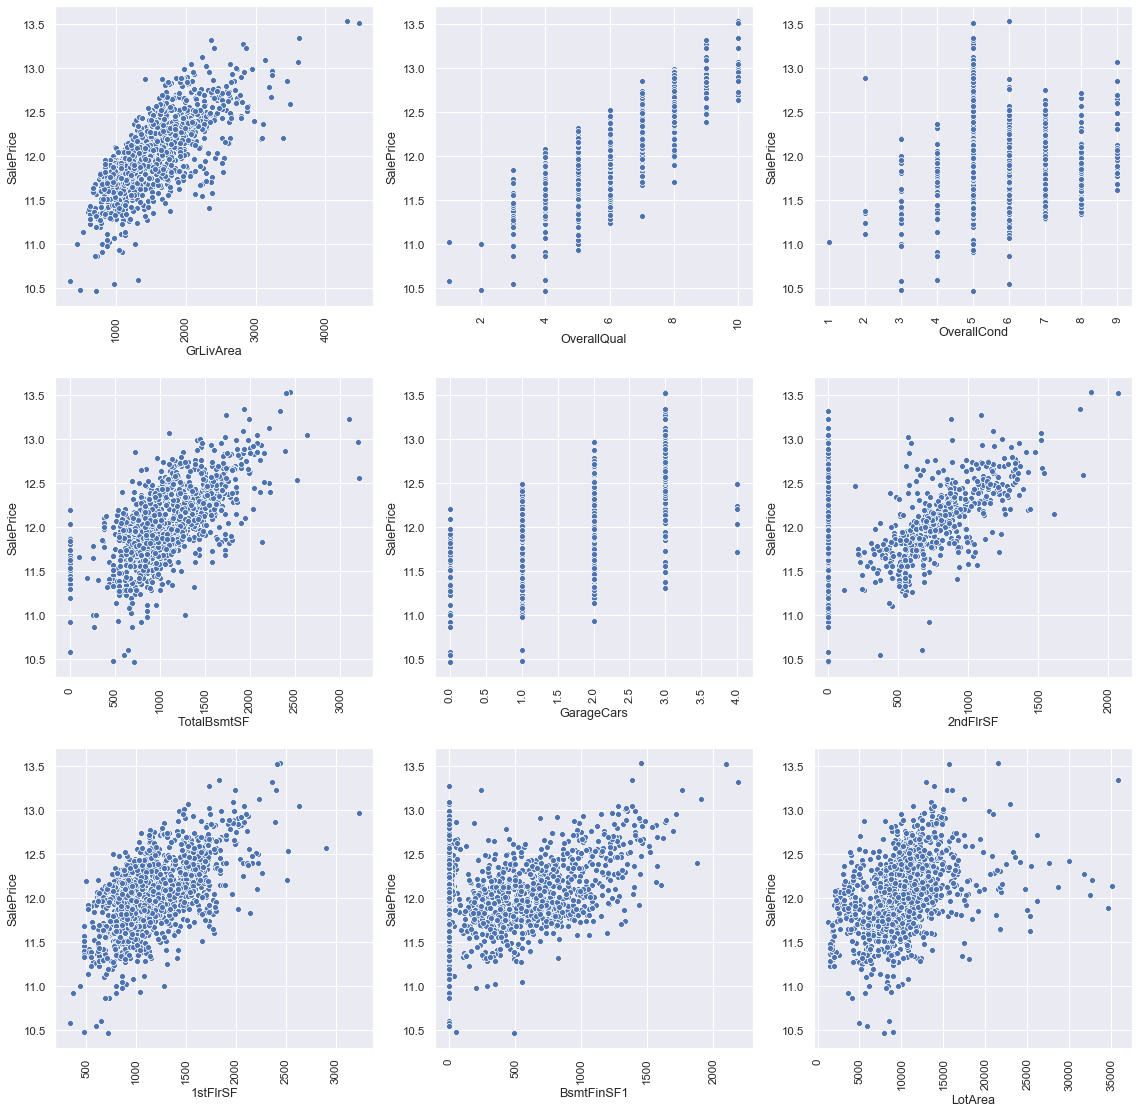

In [644]:
plt.figure(figsize = (16,20))
i = 1
for x in significant_numerical_var :
    plt.subplot(len(significant_numerical_var)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=housing_data_final)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

3


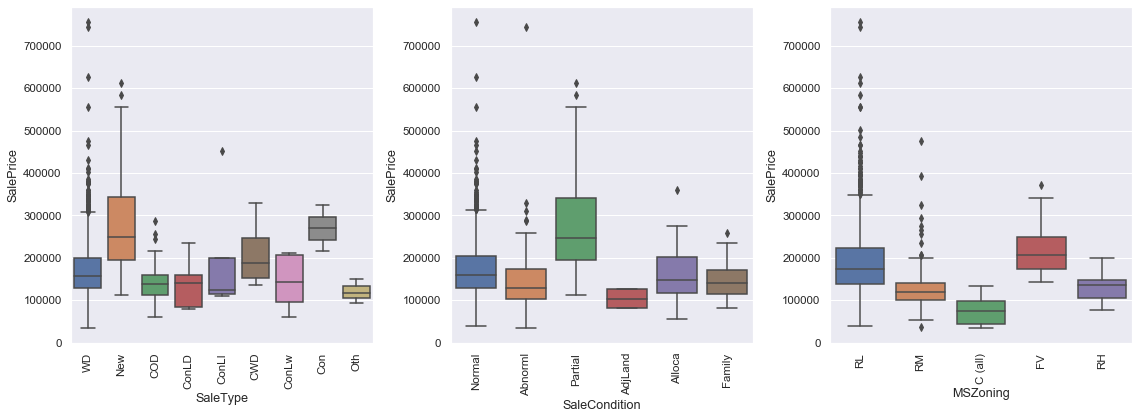

In [645]:

plt.figure(figsize = (16,6))
print(len(significant_categorical_var))
i = 1
for x in significant_categorical_var:
    plt.subplot(len(significant_categorical_var)//2,3,i)
    sns.boxplot(y='SalePrice',x=x,data=housing_df)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()
